# 绘图模块

## 绘图库matplotlib快速入门

## 基本绘图函数

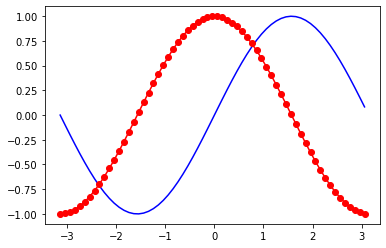

In [1]:
#绘制曲线
# step 1 引用
import matplotlib.pyplot as plt
import numpy as np
# step 2 准备数据
x=np.arange(-np.pi,np.pi,0.1)
y=np.sin(x)
# step 3  制图
plt.plot(x,y,'b',x,np.cos(x),'-ro')     # ‘b’代表使用蓝色画曲线
# step 4 显示图形
plt.show()


​

In [2]:
import numpy as np
v=np.array([1,2,3,4])
B=np.fix(10*np.random.rand(3,4))
print('v:')
print(v)
print('B:')
print(B)
print(B-v)
t=B-v
r = np.sqrt(np.sum(t**2,axis=1))
print('r=',r)
print(np.linalg.norm(B[0]-v))
print(np.linalg.norm(B[1]-v))
print(np.linalg.norm(B[2]-v))


v:
[1 2 3 4]
B:
[[0. 3. 6. 6.]
 [6. 9. 6. 0.]
 [2. 0. 7. 3.]]
[[-1.  1.  3.  2.]
 [ 5.  7.  3. -4.]
 [ 1. -2.  4. -1.]]
r= [3.87298335 9.94987437 4.69041576]
3.872983346207417
9.9498743710662
4.69041575982343


## 第1种动画实现：类MATLAB风格

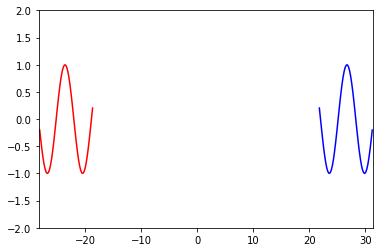

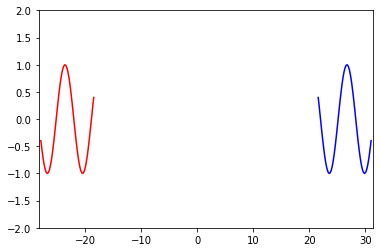

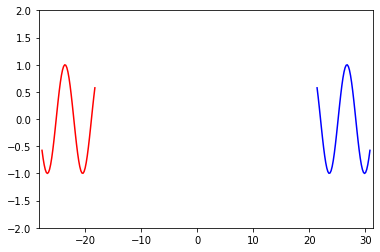

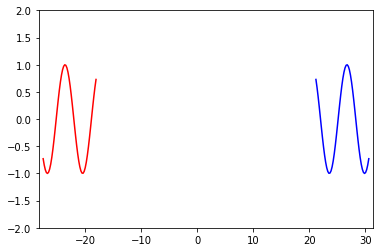

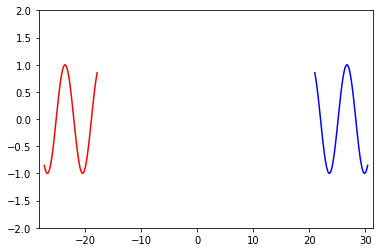

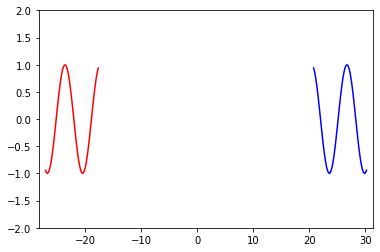

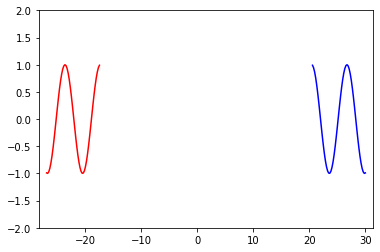

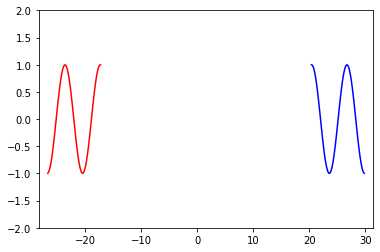

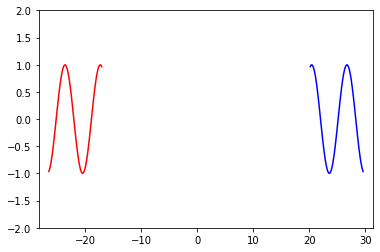

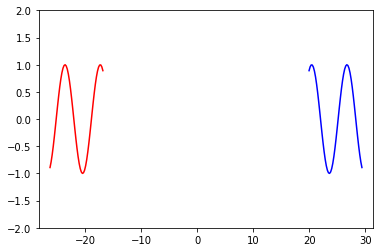

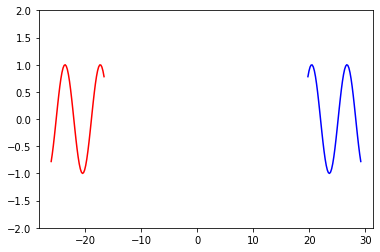

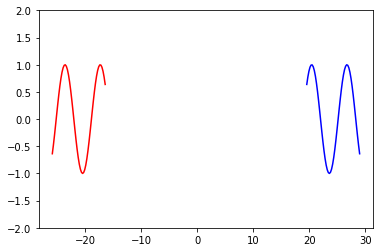

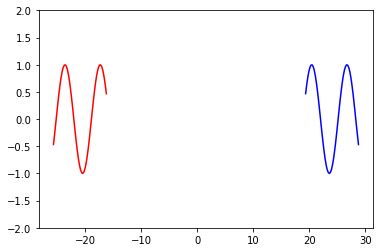

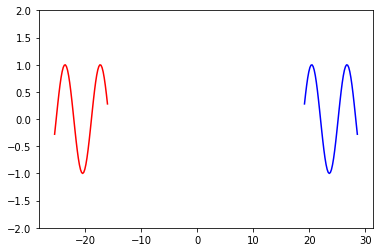

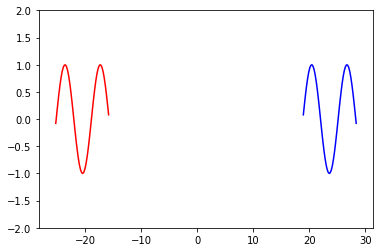

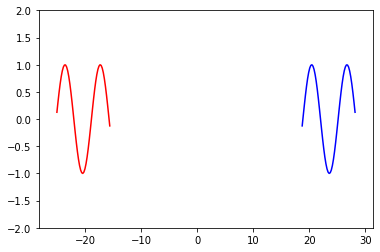

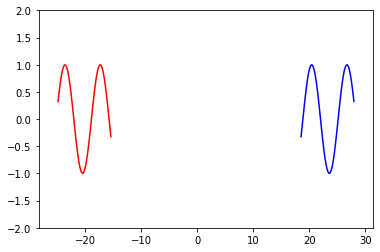

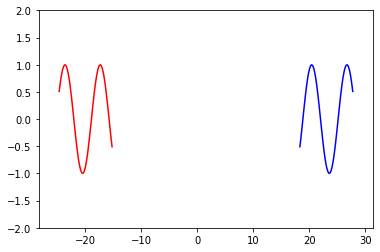

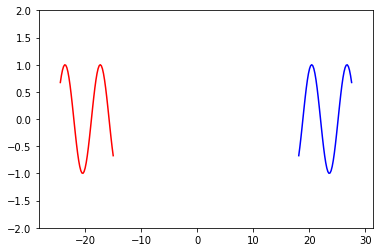

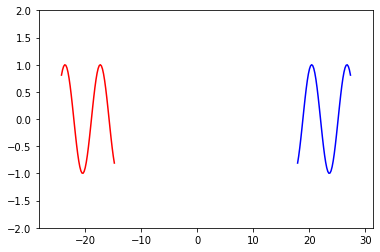

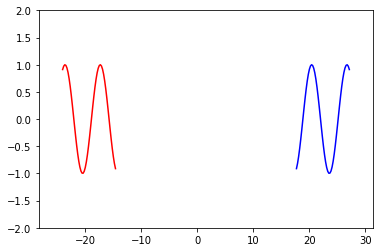

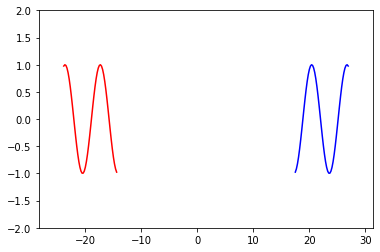

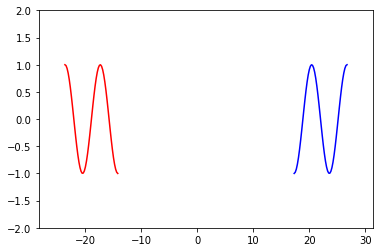

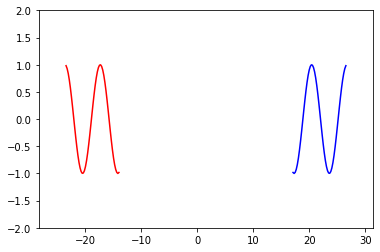

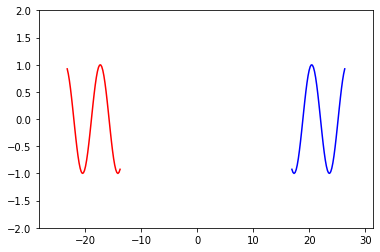

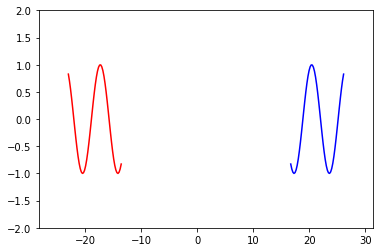

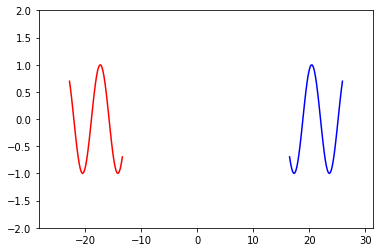

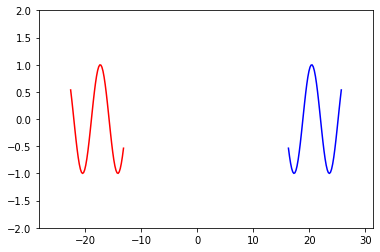

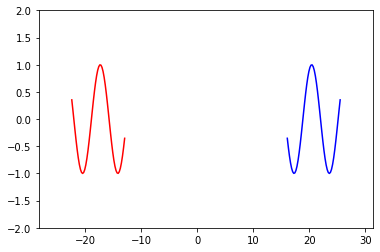

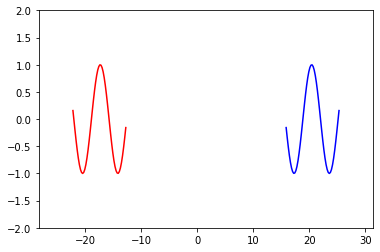

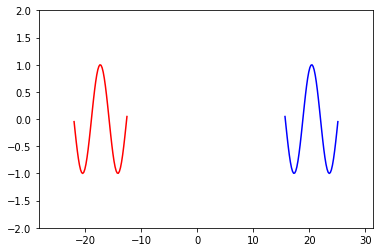

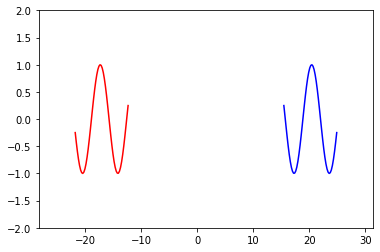

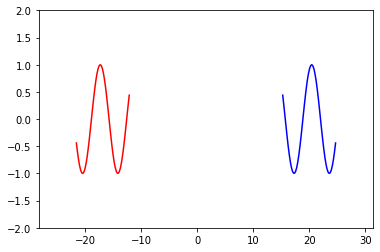

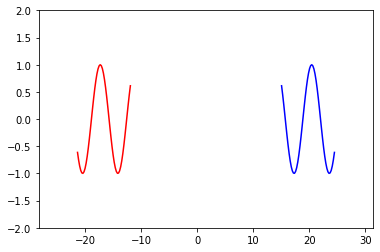

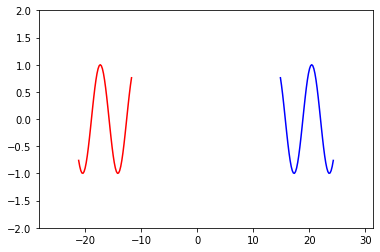

KeyboardInterrupt: 

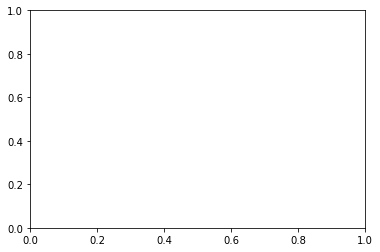

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
a1 =-9*np.pi; b1 = -6*np.pi #第一条曲线的区间[a1,b1]
a2 = 7*np.pi; b2 = 10*np.pi #第二条曲线的区间[a2,b2]
step = 13*np.pi/200
plt.ion()
for i in range(90):
    plt.cla( ) #clear axis
    a1 = a1 + step; b1 = b1 + step
    a2 = a2 - step; b2 = b2 - step
    x1 = np.linspace(a1,b1,50)
    x2 = np.linspace(a2,b2,50)
    y1 = np.sin(x1)
    y2 = np.sin(x2)
    plt.plot(x1,y1,'r',x2,y2,'b')
    #plt.show()
    #time.sleep(0.2)
    plt.xlim(-9*np.pi,10*np.pi)
    plt.ylim(-2,2)    
    plt.pause(0.1)
    


## 第2种动画实现：通过animation模块实现

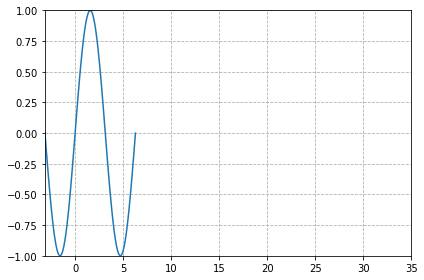

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  6 20:21:17 2022

@author: Administrator
"""


#1.2.基本动画设计

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
def update_points(num):
    '''
    更新数据点
    '''
    curve1.set_data(x+0.2*num, np.sin(x+0.2*num))
    return curve1,

x = np.linspace(-np.pi, 2*np.pi, 100)
y = np.sin(x)

fig = plt.figure(tight_layout=True)
curve1, = plt.plot(x,y)

plt.xlim(-np.pi,35)   # 设置x轴的可视范围
plt.ylim(-1,1)    # 设置y轴的可视范围


#point_ani, = plt.plot(x[0], y[0], "ro")
plt.grid(ls="--")
# 开始制作动画
ani = animation.FuncAnimation(fig, update_points, np.arange(0, 100), interval=100, blit=True)

# ani.save('sin_test2.gif', writer='imagemagick', fps=10)
plt.show()


## 交互模式设置ion()和ioff()

In [ ]:
因为python可视化库matplotlib的显示模式默认为阻塞（block）模式（即：在plt.show()之后，程序会暂停到那儿，并不会继续执行下去）。如何 展示动态图或多个窗口 呢？

使用plt.ion()这个函数，使matplotlib的显示模式转换为交互（interactive）模式。即使在脚本中遇到plt.show()，代码还是会继续执行。


在plt.show()之前一定不要忘了加plt.ioff()，如果不加，界面会一闪而过，并不会停留。

在交互模式下：

1、plt.plot(x)或plt.imshow(x)是直接出图像，不需要plt.show()。

2、如果在脚本中使用ion()命令开启了交互模式，没有使用ioff()关闭的话，则图像会一闪而过，并不会常留。要想防止这种情况，需要在plt.show()之前加上ioff()命令。

在阻塞模式下：

1、打开一个窗口以后必须关掉才能打开下一个新的窗口。这种情况下，默认是不能像Matlab一样同时开很多窗口进行对比的。

2、plt.plot(x)或plt.imshow(x)是直接出图像，需要plt.show()后才能显示图像。

版权声明：本文为CSDN博主「Yale曼陀罗」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/weixin_42782150/article/details/107015617

https://blog.csdn.net/o0haidee0o/article/details/80516086

## python绘图时ion和ioff的用法

* https://blog.csdn.net/shangxiaqiusuo1/article/details/82994695

如果想更新曲线的时候，在一个figure上画出不断更新的曲线的时候，需要用到plt.ion()和plt.ioff()以及plt.show()的配合，具体使用步骤如下：
* 1、plt.ion()前面写绘图的准备工作，比如数据的准备，fig和ax的准备（图像和轴）等等。此时也可以绘图，作为底板或者其它用处。
* 2、在plt.ion()和plt.ioff()的之间写更新函数，或者其它的。
注：在更新曲线的时候要先擦除原有的曲线，放到try，except里面，第一次没绘制的时候擦除肯定报错，放这里面就可以防止报错后退出程序，在第二次循环的时候就可以正常擦除了。
* 3、在plt.ioff()后面紧跟着写上plt.show()防止程序在绘图结束后闪退。


版权声明：本文为CSDN博主「coding上下求索」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/shangxiaqiusuo1/article/details/82994695

In [ ]:
# -*- coding: utf-8 -*-
 
import numpy as np
import matplotlib.pyplot as plt
import time

 
x = np.linspace(-1, 1, 100)
y = np.sin(x*np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
for i in range(100):
    if i%2==0:
        try:
            ax.lines.remove(lines[0])
        except Exception as e:
            print(e)
        if i!=0:
            lines = ax.plot(x, y/i, 'r-', lw=5)
        plt.pause(0.3)
        print('x,y=({},{})'.format(x[i], y[i]))
plt.ioff()
plt.show()

In [ ]:
x,y=(-1.0,-1.2246467991473532e-16)
name 'lines' is not defined
x,y=(-0.9595959595959596,-0.12659245357374938)
x,y=(-0.9191919191919192,-0.2511479871810793)
x,y=(-0.8787878787878788,-0.3716624556603276)
x,y=(-0.8383838383838383,-0.4861967361004687)
x,y=(-0.797979797979798,-0.5929079290546404)
x,y=(-0.7575757575757576,-0.6900790114821119)
x,y=(-0.7171717171717171,-0.776146464291757)
x,y=(-0.6767676767676767,-0.8497254299495146)
x,y=(-0.6363636363636364,-0.9096319953545184)
x,y=(-0.5959595959595959,-0.954902241444074)
x,y=(-0.5555555555555556,-0.984807753012208)
x,y=(-0.5151515151515151,-0.998867339183008)
x,y=(-0.4747474747474747,-0.9968547759519423)
x,y=(-0.43434343434343425,-0.9788024462147786)
x,y=(-0.3939393939393939,-0.9450008187146685)
x,y=(-0.3535353535353535,-0.8959937742913359)
x,y=(-0.31313131313131304,-0.8325698546347712)
x,y=(-0.2727272727272727,-0.7557495743542583)
x,y=(-0.23232323232323226,-0.6667690005162915)
x,y=(-0.19191919191919182,-0.5670598638627704)
x,y=(-0.1515151515151515,-0.4582265217274103)
x,y=(-0.11111111111111105,-0.34202014332566855)
x,y=(-0.07070707070707061,-0.2203105327865403)
x,y=(-0.030303030303030276,-0.09505604330418257)
x,y=(0.010101010101010166,0.03172793349806785)
x,y=(0.05050505050505061,0.15800139597335022)
x,y=(0.09090909090909105,0.2817325568414301)
x,y=(0.1313131313131315,0.40093053540661416)
x,y=(0.1717171717171717,0.5136773915734063)
x,y=(0.21212121212121215,0.6181589862206053)
x,y=(0.2525252525252526,0.7126941713788629)
x,y=(0.29292929292929304,0.7957618405308323)
x,y=(0.3333333333333335,0.8660254037844388)
x,y=(0.3737373737373739,0.9223542941045816)
x,y=(0.41414141414141437,0.9638421585599423)
x,y=(0.4545454545454546,0.9898214418809327)
x,y=(0.49494949494949503,0.9998741276738751)
x,y=(0.5353535353535355,0.9938384644612541)
x,y=(0.5757575757575759,0.9718115683235415)
x,y=(0.6161616161616164,0.9341478602651065)
x,y=(0.6565656565656568,0.8814533634475816)
x,y=(0.696969696969697,0.8145759520503357)
x,y=(0.7373737373737375,0.7345917086575331)
x,y=(0.7777777777777779,0.6427876096865391)
x,y=(0.8181818181818183,0.5406408174555974)
x,y=(0.8585858585858588,0.42979491208917103)
x,y=(0.8989898989898992,0.3120334456984865)
x,y=(0.9393939393939394,0.18925124436041008)
x,y=(0.9797979797979799,0.0634239196565644)


* 例如，下面的代码画出正弦函数 y = s i n ( x ) y=sin(x)y=sin(x) 的图形。

原文链接：https://blog.csdn.net/robert_chen1988/article/details/100023613

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.arange(0, 10, 0.1) # 横坐标数据为从0到10之间，步长为0.1的等差数组
y = np.sin(x) # 纵坐标数据为 x 对应的 sin(x) 值

# 生成图形
plt.plot(x, y)

# 显示图形
plt.show()


如果我们想自定义坐标轴的标题，坐标轴的刻度，坐标轴刻度的范围，设置图形标题，添加图例时，可以通过设置 pyplot 函数中的 xlable（横坐标轴标题）, ylabel（纵坐标轴标题）, xticks（横坐标轴刻度），yticks（纵坐标轴刻度），title（图形标题）, grid（显示网格），legend（显示图例）等属性来实现。经过自定义设置，对上图的代码进行一下修改：
————————————————
版权声明：本文为CSDN博主「心态与做事习惯决定人生高度」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/robert_chen1988/article/details/100023613

In [ ]:
# https://blog.csdn.net/robert_chen1988/article/details/100023613
import matplotlib.pyplot as plt
import numpy as np

# 这两行代码使得 pyplot 画出的图形中可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 生成数据
x = np.arange(0, 10, 0.5)
y = np.sin(x)

# 生成图形
plt.plot(x, y, 'go:', label='y=sin(x)', linewidth=2) # 颜色绿色，点形圆形，线性虚线，设置图例显示内容，线条宽度为2

plt.ylabel('y') # 横坐标轴的标题
plt.xlabel('x') # 纵坐标轴的标题
plt.xticks(np.arange(0, 11, 1)) # 设置横坐标轴的刻度为 0 到 10 的数组
plt.ylim([-2, 2]) # 设置纵坐标轴范围为 -2 到 2
plt.legend() # 显示图例, 图例中内容由 label 定义
plt.grid() # 显示网格
plt.title('我的第一个 Python 图形') # 图形的标题

# 显示图形
plt.show()


​    
![png](output_7_0.png)
​

在画图时，横坐标轴数据为年份，纵坐标轴数据分别为 GDP 增长率，第一产业增长率，第二产业增长率，第三产业增长率。为了将四个纵坐标轴数据显示在一个图形上，可以用四个 plot 函数进行划线。Python 画图的代码为：

In [ ]:
import matplotlib.pyplot as plt

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 输入纵坐标轴数据与横坐标轴数据
gdp_rate = [9.4, 10.6, 9.6, 7.9, 7.8, 7.3, 6.9, 6.7, 6.8, 6.6]
first_industry_rate = [4.0, 4.3, 4.2, 4.50, 3.8, 4.1, 3.9, 3.3, 4.0, 3.5]
second_industry_rate = [10.3, 12.7, 10.7, 8.4, 8.0, 7.4, 6.2, 6.3, 5.9, 5.8]
third_industry_rate = [9.6, 9.7, 9.5, 8.0, 8.3, 7.8, 8.2, 7.7, 7.9, 7.6]
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# 4 个 plot 函数画出 4 条线，线形为折线，每条线对应各自的标签 label
plt.plot(years, gdp_rate, '.-', label='GDP增长率')
plt.plot(years, first_industry_rate, '.-', label='第一产业增长率')
plt.plot(years, second_industry_rate, '.-', label='第二产业增长率')
plt.plot(years, third_industry_rate, '.-', label='第三产业增长率')

plt.xticks(years)  # 设置横坐标刻度为给定的年份
plt.xlabel('年份') # 设置横坐标轴标题
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形


​    
![png](output_9_0.png)
​    


### 绘制正弦函数、余弦函数曲线

In [ ]:
#绘制曲线
# step 1 引用
import matplotlib.pyplot as plt
import numpy as np

# step 2 准备数据
x = np.arange(-np.pi,np.pi,0.1)
y = np.sin(x)

# step 3  制图
plt.plot(x,y,'b')     # 'b'代表使用蓝色画曲线

# step 4 显示图形
#线宽、线型、网格线控制
#在plot中直接设定 
plt.plot(x,np.sin(2*x),color='blue',linewidth=2.0, linestyle='-') # 设置蓝色、2像素宽划线
plt.plot(x,np.cos(x),color='red',linewidth=2.0, linestyle='-.')   # 用虚线画图

plt.grid(True)# 画网格线

plt.yticks(fontproperties = 'fangsong', size = 16)
plt.xticks(fontproperties = 'fangsong', size = 16)

plt.show()

​    
![png](output_11_0.png)
​    


### 绘图与保存

In [ ]:
#coding=utf-8
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
 
# 通过rcParams设置全局横纵轴字体大小
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
 
np.random.seed(42)
 
# x轴的采样点
x = np.linspace(0, 5, 100)
 
# 通过下面曲线加上噪声生成数据，所以拟合模型就用y了……
y = 2*np.sin(x) + 0.3*x**2
y_data = y + np.random.normal(scale=0.3, size=100)
 
# figure()指定图表名称
plt.figure('data')
 
# '.'标明画散点图，每个散点的形状是个圆
plt.plot(x, y_data, '.')
 
# 画模型的图，plot函数默认画连线图
plt.figure('model')
plt.plot(x, y)
 
# 两个图画一起
plt.figure('data & model')
 
# 通过'k'指定线的颜色，lw指定线的宽度
# 第三个参数除了颜色也可以指定线形，比如'r--'表示红色虚线
# 更多属性可以参考官网：http://matplotlib.org/api/pyplot_api.html
plt.plot(x, y, 'k', lw=3)
 
# scatter可以更容易地生成散点图
plt.scatter(x, y_data)
 
# 将当前figure的图保存到文件result.png
plt.savefig('result.png')
 
# 一定要加上这句才能让画好的图显示在屏幕上
plt.show()


​    
![png](output_13_0.png)
​    




![png](output_13_1.png)
    




![png](output_13_2.png)
    


## 绘制三维图形1

In [ ]:
#coding=utf-8
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
#X,Y,Z  are  np.array
#angle is a tuple, stands for the initial view angle of 3D figure
 
def draw3D(X,Y,Z, angle):
    fig = plt.figure(figsize=(15,7))
    ax = Axes3D(fig)
    ax.view_init(angle[0],angle[1])
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,alpha=0.8)
    plt.show()
 
 
#e.g.
def functionD(ele):
    return 0
    
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
X,Y=np.meshgrid(x,y)
X_f=X.flatten()
Y_f=Y.flatten()
data=zip(X_f,Y_f)
z1=np.array([functionD(d) for d in data])
z1=z1.reshape(100,100)
 
draw3D(X,Y,z1,(75,80))


​    
![png](output_15_0.png)
​    


## 绘制三维图形2

In [ ]:
#coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
 
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection="3d")
 
#准备数据
x = np.arange(-5, 5, 0.25)   #生成[-5，5] 间隔0.25的数列，间隔越小，曲面越平滑
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x,y)   #格点矩阵，原来的x行向量向下复制len(y)此形成
# len(y)*len(x)的矩阵，即为新的x矩阵；原来的y列向量向右复制len(x)次，形成
# len(y)*len(x)的矩阵，即为新的y矩阵；新的x矩阵和新的y矩阵shape相同
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r)
 
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)   #cmap指color map
 
#自定义z轴
ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(20))   #z轴网格线的疏密，刻度的疏密，20表示刻度的个数
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))   #将z的value子符串转为float，保留2位小数
 
#设置坐标轴的label和标题
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.set_zlabel('z', size=15)
ax.set_title("Surface plot", weight='bold', size=20)
 
#添加右侧的色卡条
fig.colorbar(surf, shrink=0.6, aspect=8) #shrink表示整体收缩比例，aspect仅对bar的宽度有影响，
# aspect值越大，bar越窄
 
plt.show()
'''
作者：xiaoyaoyao17 
来源：CSDN 
原文：https://blog.csdn.net/GeneralLi95/article/details/79064621 
版权声明：本文为博主原创文章，转载请附上博文链接！
'''


## 绘制柱状图,饼图

In [ ]:
#coding=utf-8
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
 
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
 
# 包含了狗，猫和猎豹的最高奔跑速度，还有对应的可视化颜色
speed_map = {
    'dog': (48, '#7199cf'),
    'cat': (45, '#4fc4aa'),
    'cheetah': (120, '#e1a7a2')
}
 
# 整体图的标题
fig = plt.figure('Bar chart & Pie chart')
 
# 在整张图上加入一个子图，121的意思是在一个1行2列的子图中的第一张
ax = fig.add_subplot(121)
ax.set_title('Running speed - bar chart')
 
# 生成x轴每个元素的位置
xticks = np.arange(3)
 
# 定义柱状图每个柱的宽度
bar_width = 0.5
 
# 动物名称
animals = speed_map.keys()
 
# 奔跑速度
speeds = [x[0] for x in speed_map.values()]
 
# 对应颜色
colors = [x[1] for x in speed_map.values()]
 
# 画柱状图，横轴是动物标签的位置，纵轴是速度，定义柱的宽度，同时设置柱的边缘为透明
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none')
 
# 设置y轴的标题
ax.set_ylabel('Speed(km/h)')
 
# x轴每个标签的具体位置，设置为每个柱的中央
ax.set_xticks(xticks+bar_width/2)
 
# 设置每个标签的名字
ax.set_xticklabels(animals)
 
# 设置x轴的范围
ax.set_xlim([bar_width/2-0.5, 3-bar_width/2])
 
# 设置y轴的范围
ax.set_ylim([0, 125])
 
# 给每个bar分配指定的颜色
for bar, color in zip(bars, colors):
    bar.set_color(color)
 
# 在122位置加入新的图
ax = fig.add_subplot(122)
ax.set_title('Running speed - pie chart')
 
# 生成同时包含名称和速度的标签
labels = ['{}\n{} km/h'.format(animal, speed) for animal, speed in zip(animals, speeds)]
 
# 画饼状图，并指定标签和对应颜色
ax.pie(speeds, labels=labels, colors=colors)
 
plt.show()


​    
![png](output_19_0.png)
​    


## 动画程序框架1

In [ ]:
#https://segmentfault.com/q/1010000014487033
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 18/2/26 下午12:52
# @Author  : AlexZ33
# @File    :
# @Desc    :
# 2021.04.28 略有修改

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D


import threading

# 解决中文乱码问题
#myfont = fm.FontProperties(fname='/home/zk/study/python_lessions/DataVisualiztion/Library/Fonts/simsun.ttc', size=14)
myfont = fm.FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20) #会有警告
matplotlib.rcParams["axes.unicode_minus"] = False

#plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签 OK
#plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置

def simple_plot():
    """
    simple plot
    :return:
    """
    #生成画布
    plt.figure(figsize=(8,6), dpi=80)

    #打开交互模式
    #plt.ion()

    # 循环
    for index in range(10):
        #清除原有图像
        aa =plt.cla()
        #aa.axis(1,100,1,100)
        #设定标题等
        plt.title("动态曲线图",fontproperties=myfont)
        plt.grid(True)

        #生成测试数据
        x = np.linspace(-np.pi, np.pi, 256,endpoint = True) + 0.1*np.pi*index

        y_cos, y_sin = np.cos(x),np.sin(x)

        # 设置ｘ轴
        plt.xlabel("x轴", fontproperties= myfont)
        #plt.xlim(-4 + 0.1*index,4 + 0.1*index)
        #plt.xlim(-4 ,4 + 10)
        
        #plt.xticks(np.linspace(-4 + 0.1 * index, 4 + 0.1 * index, 9, endpoint=True))
        # 设置Y轴
        plt.ylabel("Y轴", fontproperties=myfont)
        plt.ylim(-1.0, 1.0)
        #plt.yticks(np.linspace(-1, 1, 9, endpoint=True))

        # 画两条曲线
        plt.plot(x, y_cos, "b--", linewidth=2.0, label="cos示例")
        plt.plot(x, y_sin, "g-", linewidth=2.0, label="sin示例")


        # 设置图例位置,loc可以为[upper, lower, left, right, center]
        plt.legend(loc="upper left", shadow=True,prop=myfont)

        plt.xlim(-4 ,4 + 10*np.pi)
        # 暂停
        plt.pause(0.1)

    # 关闭交互模式
    #plt.ioff()

    # 图形显示
    plt.show()
    return


if __name__ == '__main__':
    if True:
        thread_hi = threading.Thread(target=simple_plot)
        thread_hi.start()
    else:
        simple_plot()



## 动画方式2

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
def update_points(num):
    '''
    更新数据点
    '''
    dragon1.set_data(x1+0.2*num, np.sin(x1+0.2*num))
    x = x2-0.2*num
    dragon2.set_data(x, np.sin(x))
    ball.set_data(17+x3, y3)
    return dragon1,dragon2,ball,

x1 = np.linspace(-np.pi, 2*np.pi, 100)
y1 = np.sin(x1)

x2 = np.linspace(35-3*np.pi, 35, 100)
y2 = np.sin(x2)

fig = plt.figure(tight_layout=True)
dragon1, = plt.plot(x1,y1)
dragon2, = plt.plot(x2,y2)
t=np.linspace(0,2*np.pi,100)
x3 = np.cos(t)
y3 = np.sin(t)
ball, = plt.plot(x3,y3)

plt.xlim(-np.pi,35)   # 设置x轴的可视范围
plt.ylim(-1,1)    # 设置y轴的可视范围


#point_ani, = plt.plot(x[0], y[0], "ro")
plt.grid(ls="--")
#开始制作动画
ani = animation.FuncAnimation(fig, update_points, np.arange(0, 100), interval=100, blit=True)
#下面网址有帮助:
#https://www.cnblogs.com/zhouzhe-blog/p/9614360.html

#ani.save('sin_test2.gif', writer='imagemagick', fps=10)
plt.show()


​    
![png](output_23_0.png)
​

In [ ]:
## 绘制三维图形

In [ ]:
#coding=utf-8
# import necessary module
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# load data from file
# you can replace this using with open
#data1 = np.loadtxt("./stereo/CameraTrajectoryNew2000.txt")

x  = np.linspace(-2*np.pi,2*np.pi,200)
y1 = 2*np.sin(x)*np.cos(x)
z1 = 3*np.exp(np.sin(x))
first_2000  = x
second_2000 = y1
third_2000  = z1

# print to check data
 

# new a figure and set it into 3d
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# set figure information
ax.set_title("3D_Curve")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# draw the figure, the color is r = read
figure = ax.plot(first_2000, second_2000, third_2000, c='r')

plt.show()


​    
![png](output_25_0.png)
​    


## 绘图示例

资料来源:
https://www.cnblogs.com/nier2b/p/10793346.html

### 柱状图

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(10)
y = 2**x + 10

plt.bar(x,y,facecolor='#9999ff',edgecolor='white')#柱颜色，柱边框颜色

for x,y in zip(x,y):#zip指把x，y结合为一个整体，一次可以读取一个x和一个y
    plt.text(x,y,'%.2f' % y,ha='center',va='bottom')#指字体在中间和柱最顶的顶部

plt.show()

​    
![png](output_27_0.png)
​    


### 等值线图

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def f(x,y):
    #用来生成高度
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100) 

X,Y = np.meshgrid(x,y)#将x，y指传入网格中
plt.contourf(X,Y,f(X,Y),8,alpha = 0.75,cmap = plt.cm.hot)#8指图中的8+1根线，绘制等温线，其中cmap指颜色

C = plt.contour(X,Y,f(X,Y),8,colors = 'black')#colors指等高线颜色
plt.clabel(C,inline = True,fontsize = 10)#inline=True指字体在等高线中

plt.xticks(())
plt.yticks(())
plt.show()

​    
![png](output_29_0.png)
​    


 ### matplotlib绘制3D图

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D#动态图所需要的包

fig = plt.figure()
ax = Axes3D(fig)
 

x = np.arange(-4,4,0.25)#0.25指-4至4间隔为0.25
y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(x,y)#x，y放入网格

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow'))#rstride=1指x方向和y方向的色块大小
#ax.contourf(X,Y,Z,zdir='z',offset=-2,cmap='rainbow')#zdir指映射到z方向，-2代表映射到了z=-2
ax.set_zlim(-2,2)
 

plt.show()

​    
![png](output_31_0.png)
​    


### 子图像

In [ ]:
plt.figure()

plt.subplot(2,2,1)#建立一个两行两列的画布，第一个
plt.plot([0,1],[0,1])
plt.subplot(2,2,2)#第二个
plt.plot([0,1],[0,1])
plt.subplot(2,2,3)#第三个
plt.plot([0,1],[0,1])
plt.subplot(2,2,4)#第四个
plt.plot([0,1],[0,1])

plt.show()

### 动态图

In [ ]:
from matplotlib import animation#动态图所需要的包

fig,ax = plt.subplots()#子图像
x = np.arange(0,2*np.pi,0.01)
line, = ax.plot(x,np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x+i/10))#用来改变的y对应的值
    return line,

def init():
    line.set_ydata(np.sin(x))#动态图初始图像
    return line,

ani = animation.FuncAnimation(fig=fig,func=animate,init_func=init,interval=20)#动态作图的方法，func动态图函数，init_func初始化函数，interval指图像改变的时间间隔
plt.show()

​    
![png](output_35_0.png)
​    


### 雷达图

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
labels = np.array(['第二周', '第三周', '第四周', '第五周', '第六周'])
nAttr = 5
data = np.array([90, 90, 100, 100, 90]) #数据值
angles = np.linspace(0, 2*np.pi, nAttr, endpoint=False)
data = np.concatenate((data, [data[0]]))
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure(facecolor="white")
plt.subplot(111, polar=True)
plt.plot(angles,data,'bo-',color ='g',linewidth=2)
plt.fill(angles,data,facecolor='g',alpha=0.25)
plt.thetagrids(angles*180/np.pi, labels)
plt.figtext(0.52, 0.95, '广师小帅强的成绩雷达图', ha='center')
plt.grid(True)
plt.show()

​    
![png](output_37_0.png)
​    


### 手绘效果

In [ ]:
from PIL import Image
import numpy as np
vec_el = np.pi/2.2 # 光源的俯视角度，弧度值
vec_az = np.pi/4. # 光源的方位角度，弧度值
depth = 10. # (0-100)
im = Image.open('e:\\pictures\\timg.png').convert('L')
a = np.asarray(im).astype('float')
grad = np.gradient(a) #取图像灰度的梯度值
grad_x, grad_y = grad #分别取横纵图像梯度值
grad_x = grad_x*depth/100.
grad_y = grad_y*depth/100.
dx = np.cos(vec_el)*np.cos(vec_az) #光源对x 轴的影响
dy = np.cos(vec_el)*np.sin(vec_az) #光源对y 轴的影响
dz = np.sin(vec_el) #光源对z 轴的影响
A = np.sqrt(grad_x**2 + grad_y**2 + 1.)
uni_x = grad_x/A
uni_y = grad_y/A
uni_z = 1./A
a2 = 255*(dx*uni_x + dy*uni_y + dz*uni_z) #光源归一化
a2 = a2.clip(0,255)
im2 = Image.fromarray(a2.astype('uint8')) #重构图像
im2.save('e:\\pictures\\fcityHandDraw.jpg')

### S形函数曲线

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

def sigmoid(x):
    # 直接返回sigmoid函数
    return 1. / (1. + np.exp(-x))

def plot_sigmoid():
    # param:起点，终点，间距
    x = np.arange(-8, 8, 0.2)
    y = sigmoid(x)
    plt.plot(x, y)

    plt.show()
if __name__ == '__main__':

    plot_sigmoid()

## 3D绘图

In [ ]:
3D图形在数据分析、数据建模、图形和图像处理等领域中都有着广泛的应用，下面将给大家介绍一下如何使用python进行3D图形的绘制，包括3D散点、3D表面、3D轮廓、3D直线（曲线）以及3D文字等的绘制。
https://blog.csdn.net/qq_36142114/article/details/80269166


准备工作：

python中绘制3D图形，依旧使用常用的绘图模块matplotlib，但需要安装mpl_toolkits工具包，安装方法如下：windows命令行进入到python安装目录下的Scripts文件夹下，执行： pip install --upgrade matplotlib即可；linux环境下直接执行该命令。

安装好这个模块后，即可调用mpl_tookits下的mplot3d类进行3D图形的绘制。

下面以实例进行说明。


版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

​    

### 3D表面形状的绘制

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
import numpy as np  

matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
  
# Make data  
u = np.linspace(0, 2 * np.pi, 100)  
v = np.linspace(0, np.pi, 100)  
x = 10 * np.outer(np.cos(u), np.sin(v))  
y = 10 * np.outer(np.sin(u), np.sin(v))  
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))  
  
# Plot the surface  
ax.plot_surface(x, y, z, color='b')  
  
plt.show() 


​    
![png](output_44_0.png)
​    


### 3D直线（曲线）的绘制

In [ ]:
import matplotlib as mpl  
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np  
import matplotlib.pyplot as plt  
  
mpl.rcParams['legend.fontsize'] = 10  
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure()  
ax = fig.gca(projection='3d')  
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)  
z = np.linspace(-2, 2, 100)  
r = z**2 + 1  
x = r * np.sin(theta)  
y = r * np.cos(theta)  
ax.plot(x, y, z, label='parametric curve')  
ax.legend()  
  
plt.show()  

#版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

In [ ]:
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)




![png](output_46_1.png)
    


### 绘制3D轮廓

In [ ]:
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.pyplot as plt  
from matplotlib import cm  

mpl.rcParams['legend.fontsize'] = 10  
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure()  
ax = fig.gca(projection='3d')  
X, Y, Z = axes3d.get_test_data(0.05)  
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)  
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)  
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)  
  
ax.set_xlabel('X')  
ax.set_xlim(-40, 40)  
ax.set_ylabel('Y')  
ax.set_ylim(-40, 40)  
ax.set_zlabel('Z')  
ax.set_zlim(-100, 100)  
  
plt.show()  


#版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

In [ ]:
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)




![png](output_48_1.png)
    


### 绘制3D直方图

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
import numpy as np  
  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
x, y = np.random.rand(2, 100) * 4  
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])  
  
# Construct arrays for the anchor positions of the 16 bars.  
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,  
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid  
# with indexing='ij'.  
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)  
xpos = xpos.flatten('F')  
ypos = ypos.flatten('F')  
zpos = np.zeros_like(xpos)  
  
# Construct arrays with the dimensions for the 16 bars.  
dx = 0.5 * np.ones_like(zpos)  
dy = dx.copy()  
dz = hist.flatten()  
  
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')  
  
plt.show() 

#版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

​    
![png](output_50_0.png)
​    


### 绘制3D网状线

In [ ]:
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.pyplot as plt  
  
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
  
# Grab some test data.  
X, Y, Z = axes3d.get_test_data(0.05)  
  
# Plot a basic wireframe.  
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)  
  
plt.show()  

#版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

​    
![png](output_52_0.png)
​    


### 绘制3D三角面片图

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
import numpy as np  
  
  
n_radii = 8  
n_angles = 36  
  
# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).  
radii = np.linspace(0.125, 1.0, n_radii)  
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)  
  
# Repeat all angles for each radius.  
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)  
  
# Convert polar (radii, angles) coords to cartesian (x, y) coords.  
# (0, 0) is manually added at this stage,  so there will be no duplicate  
# points in the (x, y) plane.  
x = np.append(0, (radii*np.cos(angles)).flatten())  
y = np.append(0, (radii*np.sin(angles)).flatten())  
  
# Compute z to make the pringle surface.  
z = np.sin(-x*y)  
  
fig = plt.figure()  
ax = fig.gca(projection='3d')  
  
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)  
  
plt.show()  

#版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

​    
![png](output_54_0.png)
​    


### 绘制3D散点图

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
import numpy as np  
  
  
def randrange(n, vmin, vmax):  
    ''''' 
    Helper function to make an array of random numbers having shape (n, ) 
    with each number distributed Uniform(vmin, vmax). 
    '''  
    return (vmax - vmin)*np.random.rand(n) + vmin  
  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
  
n = 100  
  
# For each set of style and range settings, plot n random points in the box  
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].  
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:  
    xs = randrange(n, 23, 32)  
    ys = randrange(n, 0, 100)  
    zs = randrange(n, zlow, zhigh)  
    ax.scatter(xs, ys, zs, c=c, marker=m)  
  
ax.set_xlabel('X Label')  
ax.set_ylabel('Y Label')  
ax.set_zlabel('Z Label')  
  
plt.show() 

#版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

​    
![png](output_56_0.png)
​    


### 绘制3D文字

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
  
  
fig = plt.figure()  
ax = fig.gca(projection='3d')  
  
# Demo 1: zdir  
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))  
xs = (1, 4, 4, 9, 4, 1)  
ys = (2, 5, 8, 10, 1, 2)  
zs = (10, 3, 8, 9, 1, 8)  
  
for zdir, x, y, z in zip(zdirs, xs, ys, zs):  
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)  
    ax.text(x, y, z, label, zdir)  
  
# Demo 2: color  
ax.text(9, 0, 0, "red", color='red')  
  
# Demo 3: text2D  
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.  
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)  
  
# Tweaking display region and labels  
ax.set_xlim(0, 10)  
ax.set_ylim(0, 10)  
ax.set_zlim(0, 10)  
ax.set_xlabel('X axis')  
ax.set_ylabel('Y axis')  
ax.set_zlabel('Z axis')  
  
plt.show()  

#版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

​    
![png](output_58_0.png)
​    


### 3D条状图

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt  
import numpy as np  
  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):  
    xs = np.arange(20)  
    ys = np.random.rand(20)  
  
    # You can provide either a single color or an array. To demonstrate this,  
    # the first bar of each set will be colored cyan.  
    cs = [c] * len(xs)  
    cs[0] = 'c'  
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)  
  
ax.set_xlabel('X')  
ax.set_ylabel('Y')  
ax.set_zlabel('Z')  
  
plt.show()  


#版权声明：本文为CSDN博主「leofionn」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
#原文链接：https://blog.csdn.net/qq_36142114/article/details/80269166

​    
![png](output_60_0.png)
​

In [ ]:
from tvtk.api import tvtk

# 创建一个长方体数据源，并且同时设置其长宽高
s = tvtk.CubeSource(x_length=1.0, y_length=2.0, z_length=3.0)
# 使用PolyDataMapper将数据转换为图形数据
m = tvtk.PolyDataMapper(input_connection=s.output_port)
# 创建一个Actor
a = tvtk.Actor(mapper=m)
# 创建一个Renderer，将Actor添加进去
r = tvtk.Renderer(background=(0, 0, 0))
r.add_actor(a)
# 创建一个RenderWindow(窗口)，将Renderer添加进去
w = tvtk.RenderWindow(size=(300,300))
w.add_renderer(r)
# 创建一个RenderWindowInteractor（窗口的交互工具)
i = tvtk.RenderWindowInteractor(render_window=w)
# 开启交互
i.initialize()
i.start()

## Python绘制3D图形

参考资料:

[Python绘制3D图形](https://www.jb51.net/article/139349.htm)

[python绘制三维图](https://www.cnblogs.com/xingshansi/p/6777945.html)


3D图形在数据分析、数据建模、图形和图像处理等领域中都有着广泛的应用，下面将给大家介绍一下如何使用python进行3D图形的绘制，包括3D散点、3D表面、3D轮廓、3D直线（曲线）以及3D文字等的绘制。

准备工作：

python中绘制3D图形，依旧使用常用的绘图模块matplotlib，但需要安装mpl_toolkits工具包，安装方法如下：windows命令行进入到python安装目录下的Scripts文件夹下，执行： pip install --upgrade matplotlib即可；linux环境下直接执行该命令。

安装好这个模块后，即可调用mpl_tookits下的mplot3d类进行3D图形的绘制。

下面以实例进行说明。

1、3D表面形状的绘制

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
 
# Make data 
u = np.linspace(0, 2 * np.pi, 100) 
v = np.linspace(0, np.pi, 100) 
x = 10 * np.outer(np.cos(u), np.sin(v)) 
y = 10 * np.outer(np.sin(u), np.sin(v)) 
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v)) 
 
# Plot the surface 
ax.plot_surface(x, y, z, color='b') 
 
plt.show()

​    
![png](output_2_0.png)
​    


### 2、3D直线（曲线）的绘制

这段代码用于绘制一个螺旋状3D曲线，结果如下：

In [ ]:
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
import matplotlib.pyplot as plt 
 
mpl.rcParams['legend.fontsize'] = 10 
 
fig = plt.figure() 
ax = fig.gca(projection='3d') 
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100) 
z = np.linspace(-2, 2, 100) 
r = z**2 + 1 
x = r * np.sin(theta) 
y = r * np.cos(theta) 
ax.plot(x, y, z, label='parametric curve') 
ax.legend() 
 
plt.show()

​    
![png](output_4_0.png)
​    


### 3、绘制3D轮廓

In [ ]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt 
from matplotlib import cm 
 
fig = plt.figure() 
ax = fig.gca(projection='3d') 
X, Y, Z = axes3d.get_test_data(0.05) 
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm) 
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm) 
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm) 
 
ax.set_xlabel('X') 
ax.set_xlim(-40, 40) 
ax.set_ylabel('Y') 
ax.set_ylim(-40, 40) 
ax.set_zlabel('Z') 
ax.set_zlim(-100, 100) 
 
plt.show()

​    
![png](output_6_0.png)
​    


### 4、绘制3D直方图

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
x, y = np.random.rand(2, 100) * 4 
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]]) 
 
# Construct arrays for the anchor positions of the 16 bars. 
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos, 
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid 
# with indexing='ij'. 
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25) 
xpos = xpos.flatten('F') 
ypos = ypos.flatten('F') 
zpos = np.zeros_like(xpos) 
 
# Construct arrays with the dimensions for the 16 bars. 
dx = 0.5 * np.ones_like(zpos) 
dy = dx.copy() 
dz = hist.flatten() 
 
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average') 
 
plt.show()

​    
![png](output_9_0.png)
​    


### 5、绘制3D网状线

In [ ]:
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.pyplot as plt 
 
 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
 
# Grab some test data. 
X, Y, Z = axes3d.get_test_data(0.05) 
 
# Plot a basic wireframe. 
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10) 
 
plt.show()

​    
![png](output_11_0.png)
​    


### 6、绘制3D三角面片图

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
 
 
n_radii = 8 
n_angles = 36 
 
# Make radii and angles spaces (radius r=0 omitted to eliminate duplication). 
radii = np.linspace(0.125, 1.0, n_radii) 
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False) 
 
# Repeat all angles for each radius. 
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1) 
 
# Convert polar (radii, angles) coords to cartesian (x, y) coords. 
# (0, 0) is manually added at this stage, so there will be no duplicate 
# points in the (x, y) plane. 
x = np.append(0, (radii*np.cos(angles)).flatten()) 
y = np.append(0, (radii*np.sin(angles)).flatten()) 
 
# Compute z to make the pringle surface. 
z = np.sin(-x*y) 
 
fig = plt.figure() 
ax = fig.gca(projection='3d') 
 
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True) 
 
plt.show()